In [1]:
import topology_interface_main as tim
import haldane_model as verify
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import z2pack
#import yaehmop_tools


# Description of Interface Workflow

# Verification of Interface in 1D, 2D using SSH model, Haldane Model, and BHZ model

periodic SSH Hamiltonian Results in a chern number of 1 when t2>t1


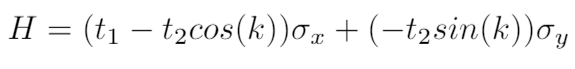

In [2]:
from IPython.display import Image
print("periodic SSH Hamiltonian Results in a chern number of 1 when t2>t1")
Image(filename="ssh_ham.png")


+----------------------------------------------------------------------+
| ================                                                     |
| LINE CALCULATION                                                     |
| ================                                                     |
| starting at 2021-08-06 10:14:15,817                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| init_result: None                                                    |
| iterator:    range(10, 40)                                           |
| line:        <function get_topology.<locals>.<lambda> at 0x05801468> |
| load:        False                                                   |
| load_quiet:  True                                                    |
| pos_tol:     None                                                    |
| save_file:   None                               


+----------------------------------------------------------------------+
| ================                                                     |
| LINE CALCULATION                                                     |
| ================                                                     |
| starting at 2021-08-06 10:14:15,931                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| init_result: None                                                    |
| iterator:    range(10, 40)                                           |
| line:        <function get_topology.<locals>.<lambda> at 0x05801198> |
| load:        False                                                   |
| load_quiet:  True                                                    |
| pos_tol:     None                                                    |
| save_file:   None                               


+----------------------------------------------------------------------+
| ================                                                     |
| LINE CALCULATION                                                     |
| ================                                                     |
| starting at 2021-08-06 10:14:16,033                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| init_result: None                                                    |
| iterator:    range(10, 40)                                           |
| line:        <function get_topology.<locals>.<lambda> at 0x05599F18> |
| load:        False                                                   |
| load_quiet:  True                                                    |
| pos_tol:     None                                                    |
| save_file:   None                               


+----------------------------------------------------------------------+
| ================                                                     |
| LINE CALCULATION                                                     |
| ================                                                     |
| starting at 2021-08-06 10:14:16,184                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| init_result: None                                                    |
| iterator:    range(10, 40)                                           |
| line:        <function get_topology.<locals>.<lambda> at 0x05599F18> |
| load:        False                                                   |
| load_quiet:  True                                                    |
| pos_tol:     None                                                    |
| save_file:   None                               


+----------------------------------------------------------------------+
| ================                                                     |
| LINE CALCULATION                                                     |
| ================                                                     |
| starting at 2021-08-06 10:14:16,305                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| init_result: None                                                    |
| iterator:    range(10, 40)                                           |
| line:        <function get_topology.<locals>.<lambda> at 0x0A82DE88> |
| load:        False                                                   |
| load_quiet:  True                                                    |
| pos_tol:     None                                                    |
| save_file:   None                               

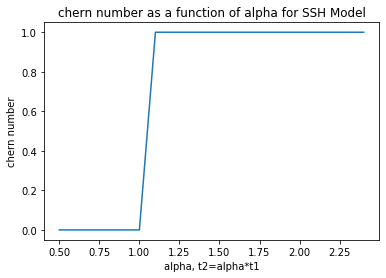

In [3]:
#chern_, z2_ = tim.get_topology("ssh_output.OUT")
alpha=np.arange(0.5,2.5,0.1)
k_vect=tim.generate_k_1D(nkx=10)
al=1.0
# ham=verify.ssh_hamiltonian(al)
# verify.plot_bands(ham,np.linspace(-1,1,100))
# plt.title("band structure alpha=2.0")
# plt.show()

fname="ssh_output.OUT"
chern_=[]
for a in alpha:
    k_vect=tim.generate_k_1D(nkx=10)
    hamiltonian=verify.ssh_hamiltonian(a,t1=-1.0)
    verify.write_yaehmop_output_from_ham(fname,k_vect,hamiltonian)
    
    c = tim.get_topology(fname,ham_type="general")
    chern_.append(c)


plt.plot(alpha,chern_)
#t2=t1*alpha
plt.title("chern number as a function of alpha for SSH Model")
plt.ylabel("chern number")
plt.xlabel("alpha, t2=alpha*t1")
plt.show()

Haldane Hamiltonian Results in a chern number of 1.0


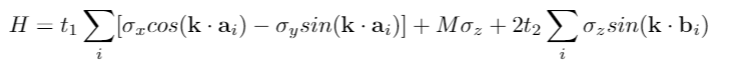

In [4]:
print("Haldane Hamiltonian Results in a chern number of 1.0")
Image(filename="haldane_ham.png")

In [5]:
#get topology of Haldane model as a test, Haldane model results placed in Yaehmop like output file to test functions
#need to figure out how to surpress print statement from z2pack
alpha=np.arange(0.5,4.0,0.1)
m, t1, phi=0.5, 1., 0.5 * np.pi
k_vect=tim.generate_k_2D_try()
fname="haldane_output.OUT"
chern_=[]
z2_=[]
for a in alpha:
    ham=verify.haldane_hamiltonian(m,t1,t1/a,phi)
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    c, z = tim.get_topology(fname,ham_type="general")
    chern_.append(c)
    z2_.append(z)
chern_=np.array(chern_)
z2_=np.array(z2_)

plt.plot(alpha,chern_)
plt.title("plotting chern number of haldane model as t2 is varied relative to t1")
plt.xlabel("alpha, t2=t1/alpha")
plt.ylabel("chern number")
plt.show()


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-06 10:14:19,302                                   |
|running Z2Pack version 2.1.1                                          |
|                                                                      |
|gap_tol:            None                                              |
|init_result:        None                                              |
|iterator:           range(10, 40)                                     |
|load:               False                                             |
|load_quiet:         True                                              |
|min_neighbour_dist: 0.01                                              |
|move_tol:           None                         

TypeError: z2() got an unexpected keyword argument 'check_kramers_pairs'

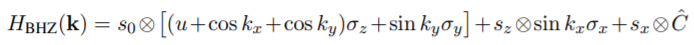

In [6]:
Image(filename="bhz_ham.png")

In [7]:
# chern_, z2_ = tim.get_topology("bhz_output.OUT")
# print("chern number ",chern_)
# print("z2 invariant ",z2_)

alpha=np.arange(-1.0,1.0,0.1)


fname="bhz_output.OUT"
chern_=[]
z2_=[]
for a in alpha:
    k_vect=tim.generate_k_2D(nkx=10,nky=10,max_kx=0.5)
    ham=verify.bhz(0.5, 1, 0., 0, a)
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    c, z = tim.get_topology(fname,ham_type="general")
    chern_.append(c)
    z2_.append(z)
chern_=np.array(chern_)
z2_=np.array(z2_)

plt.plot(alpha,z2_)
plt.title("plotting z2 of bhz model as is varied relative to relative mass")
plt.xlabel("relative mass")
plt.ylabel("z2 invariant")
plt.show()


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-08-06 10:14:24,584                                   |
|running Z2Pack version 2.1.1                                          |
|                                                                      |
|gap_tol:            None                                              |
|init_result:        None                                              |
|iterator:           range(10, 40)                                     |
|load:               False                                             |
|load_quiet:         True                                              |
|min_neighbour_dist: 0.01                                              |
|move_tol:           None                         

TypeError: z2() got an unexpected keyword argument 'check_kramers_pairs'

In [10]:
mass=np.arange(-1,1,0.2)
z2_=[]
bhz_edge_surfaces=np.array([[(1,1),(0,1/2),(0,1)],
                        [(0,1/2),(1,1),(0,1)],
                        [(0,1/2),(0,1),(1,1)],
                        [(0,0),(0,1/2),(0,1)],
                        [(0,1/2),(0,0),(0,1)],
                        [(0,1/2),(0,1),(0,0)],
                        ])
n=10
fname="bhz_output3d.OUT"
for m in mass:
    k_vect=tim.generate_k_3D(n=n,surfaces=bhz_edge_surfaces)
    ham=verify.bhz_3D(.5, 1,0,0, m) 
    verify.write_yaehmop_output_from_ham(fname,k_vect,ham)
    z  = tim.get_topology(fname,ham_type="general",surfaces=bhz_edge_surfaces,n=n)
    z2_.append(z)
z2_=np.array(z2_)
print(z2_)
plt.plot(mass,z2_[:,0])
plt.title("plotting strong index (first) z2 of bhz model, varied w/ relative mass")
plt.xlabel("relative mass")
plt.ylabel("z2 invariant")
plt.show()


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-06 10:11:13,582                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| gap_tol:            None                                             |
| init_result:        None                                             |
| iterator:           range(10, 40)                                    |
| load:               False                                            |
| load_quiet:         True                                             |
| min_neighbour_dist: 0.01                                             |
| move_tol:           None                        

C:\Users\danpa\Documents\argonne\topology_interface\topological_diagnosis\topology_interface_main.py:595: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if surfaces=="default":


TypeError: z2() got an unexpected keyword argument 'check_kramers_pairs'

# Using interface to detect topologically non-trivial materials from POSCAR files

In [5]:
input_POSCAR="bhz_output3d.OUT"

#get topology of Yaehmop output file structure

output_yaehmop_filename="mp-47.OUT"
z2_ = tim.get_topology(output_yaehmop_filename)
print(z2_)


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2021-08-04 15:45:12,461                                  |
| running Z2Pack version 2.1.1                                         |
|                                                                      |
| gap_tol:            None                                             |
| init_result:        None                                             |
| iterator:           range(17, 40)                                    |
| load:               False                                            |
| load_quiet:         True                                             |
| min_neighbour_dist: 0.01                                             |
| move_tol:           None                        

ValueError: Start and end points of the line differ by [0.     0.     0.3333], which is not an inverse lattice vector.